# **Rohan Somadder**                           

## Task 1 - Simple Linear Regression - GRIP, The Sparks Foundation
 In this task we have to predict the percentage of marks for different students based on the number of hours they have studied. This is a simple linear regression task as it involves only two variables.
 
### **Tool used - Python (Jupyter Notebook)**
 
### For help in  formatting text visit <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/" target="_blank">this link</a>.

***
### `Initializing variables and libraries`
****

In [56]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression       #for using different linear regression related functions
import seaborn as sns                                   #for better plotting of regression models

In [17]:
#special class defined for output formatting
class colour:
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [28]:
#importing data from csv as link
try:                                  # Using try-except in case of error  
    link = "http://bit.ly/w-data"
    data=pd.read_csv(link)
    print(colour.BOLD + "Data imported succesfully" + colour.END)
    display(data)
except:
    print(colour.RED + "Failed" + colour.END)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [229]:
#checking for NaN values
score_sample = data
score_sample.isna().sum()

Hours     0
Scores    0
dtype: int64

In [228]:
#checking for wrong values 
score_sample.query('Scores > 100') 
score_sample.query('Scores < 0')
 

,Hours,Scores


Data is consistent as no wrong data is found

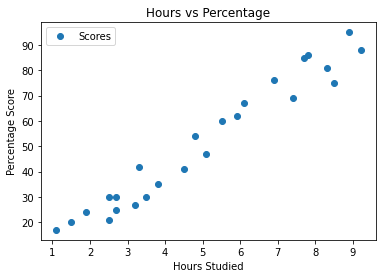

In [227]:
# Plotting the distribution of scores

score_sample.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

***
### `Prepairing the Data and Training the Algorithm`
***

In [220]:
# prepairing inputs
X=score_sample.iloc[:, :-1].values 
Y=score_sample.iloc[:, 1].values

# Splitting the data into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.18,random_state=0)

In [221]:
# Training the data 
LReg = LinearRegression() 
model = LReg.fit(X_train,Y_train)
predicted = LReg.predict(X_test)

# R^2 (coefficient of determination) regression score function
score =r2_score(Y_test,predicted)
print(colour.BOLD + "R^2 Score : {}".format(score) + colour.END)

R^2 Score : 0.9454906892105354


### Plotting the Regression plot

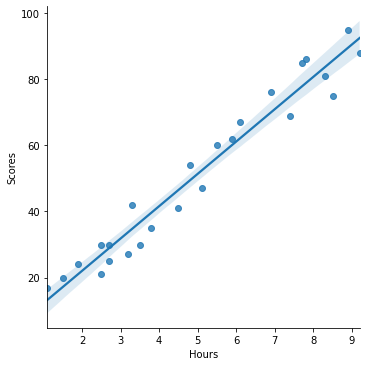

In [226]:
sns.lmplot(x='Hours',y='Scores',data=score_sample)

In [225]:
df1 = pd.DataFrame(Y_test).rename(columns={0:'Actual'})
df2 = pd.DataFrame(predicted).rename(columns={0:'Predictions'})
Result = pd.concat([df1,df2],axis=1,join='inner')

Result

,Actual,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


***
### `Evaluation of Model`
***

In [223]:
#now predicting for the given amount of hours
#hours = []
hours = 9.25
own_pred = LReg.predict([[hours]])
print(colour.BOLD + "No of Hours = {}".format(hours) + colour.END)
print(colour.BOLD + "Predicted Score = {}".format(own_pred[0]) + colour.END)

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [222]:
print(colour.BOLD + 'Mean Absolute Error = {}'.format(metrics.mean_absolute_error(Y_test, predicted)) + colour.END)
print(colour.BOLD + 'Mean Squared Error = {}'.format(metrics.mean_squared_error(Y_test, predicted)) + colour.END)
print(colour.BOLD + 'Root Mean Squared Error = {}'.format(np.sqrt(metrics.mean_squared_error(Y_test,predicted))) + colour.END)

Mean Absolute Error = 4.183859899002982
Mean Squared Error = 21.598769307217456
Root Mean Squared Error = 4.647447612100373
